### 1.Importing Libraries and Reading Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
promotion_df = pd.read_csv('/content/PromotionDates.csv')
sales_df = pd.read_csv('/content/assignment4.1a.csv')
sales_test_df = pd.read_csv('/content/assignment4.1b.csv')
product_df = pd.read_csv('/content/assignment4.1c.csv')

In [ ]:
# Convert the date columns to the appropriate format
promotion_df['StartDate'] = pd.to_datetime(promotion_df['StartDate'], errors='coerce')
promotion_df['EndDate'] = pd.to_datetime(promotion_df['EndDate'], errors='coerce')
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_test_df['Date'] = pd.to_datetime(sales_test_df['Date'])

<ipython-input-5-62100461653f>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  promotion_df['StartDate'] = pd.to_datetime(promotion_df['StartDate'], errors='coerce')
<ipython-input-5-62100461653f>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  promotion_df['EndDate'] = pd.to_datetime(promotion_df['EndDate'], errors='coerce')


In [ ]:
promotion_df

,Period,StartDate,EndDate
0,Promo1,2015-02-10,2015-02-17
1,Promo2,2015-03-15,2015-03-22
2,Promo3,2015-05-24,2015-06-01
3,Promo4,2015-06-21,2015-06-28
4,Promo5,2015-01-09,2015-06-09
5,Promo6,2015-11-20,2015-11-27


In [ ]:
sales_df

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0
...,...,...,...,...
1873613,2015-07-30,292,315,0
1873614,2015-07-31,12,315,1
1873615,2015-07-31,104,315,1
1873616,2015-07-31,261,315,1


In [ ]:
for index, row in promotion_df.iterrows():
    promo_name = row['Period']
    if promo_name in ['Promo1', 'Promo2', 'Promo3', 'Promo4']:
        start_date = pd.to_datetime(row['StartDate'])
        end_date = pd.to_datetime(row['EndDate'])

        mask = (sales_df['Date'] >= start_date) & (sales_df['Date'] <= end_date)

        sales_df.loc[mask, 'IsPromotion'] = 1
        sales_df.loc[mask, 'PromotionName'] = promo_name

sales_df['IsPromotion'].fillna(0, inplace=True)
sales_df['PromotionName'].fillna(0, inplace=True)

In [ ]:
sales_df[sales_df['IsPromotion']==1].head(10)

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromotionName
507,2015-02-10,6,9,0,1.0,Promo1
508,2015-02-10,14,9,0,1.0,Promo1
509,2015-02-10,28,9,0,1.0,Promo1
510,2015-02-10,45,9,1,1.0,Promo1
511,2015-02-10,47,9,1,1.0,Promo1
512,2015-02-10,62,9,0,1.0,Promo1
513,2015-02-10,65,9,0,1.0,Promo1
514,2015-02-10,99,9,0,1.0,Promo1
515,2015-02-10,135,9,0,1.0,Promo1
516,2015-02-10,139,9,1,1.0,Promo1


In [ ]:
sales_df.describe()

,StoreCode,ProductCode,SalesQuantity,IsPromotion
count,1.873618e+06,1.873618e+06,1.873618e+06,1.873618e+06
mean,1.711288e+02,1.663533e+02,2.246632e+00,1.659479e-01
std,1.014606e+02,7.773282e+01,5.028994e+00,3.720340e-01
min,1.000000e+00,1.000000e+00,-6.000000e+01,0.000000e+00
25%,8.100000e+01,1.050000e+02,0.000000e+00,0.000000e+00
50%,1.700000e+02,1.730000e+02,1.000000e+00,0.000000e+00
75%,2.640000e+02,2.190000e+02,2.000000e+00,0.000000e+00
max,3.400000e+02,3.170000e+02,9.120000e+02,1.000000e+00


In [ ]:
sales_test_df

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1
...,...,...,...,...
1028116,2016-01-01,340,247,5
1028117,2016-01-01,340,264,1
1028118,2016-01-01,340,292,1
1028119,2016-01-01,340,305,1


In [ ]:
product_df

,ProductCode,ProductGroup1,ProductGroup2
0,1,A,5
1,2,A,5
2,3,A,5
3,4,A,5
4,5,A,5
...,...,...,...
312,313,A,5
313,314,F,27
314,315,D,16
315,316,G,3


In [ ]:
sales_df = pd.merge(sales_df, product_df, on='ProductCode', how='left')
sales_df

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromotionName,ProductGroup1,ProductGroup2
0,2015-01-01,8,9,-1,0.0,0,H,15
1,2015-01-01,131,9,1,0.0,0,H,15
2,2015-01-01,144,9,2,0.0,0,H,15
3,2015-01-01,203,9,2,0.0,0,H,15
4,2015-01-01,256,9,0,0.0,0,H,15
...,...,...,...,...,...,...,...,...
1873613,2015-07-30,292,315,0,0.0,0,D,16
1873614,2015-07-31,12,315,1,0.0,0,D,16
1873615,2015-07-31,104,315,1,0.0,0,D,16
1873616,2015-07-31,261,315,1,0.0,0,D,16


In [ ]:
sales_df['DayOfWeek'] = sales_df['Date'].dt.dayofweek+1
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Day'] = pd.DatetimeIndex(sales_df['Date']).day
sales_df

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromotionName,ProductGroup1,ProductGroup2,DayOfWeek,Month,Day
0,2015-01-01,8,9,-1,0.0,0,H,15,4,1,1
1,2015-01-01,131,9,1,0.0,0,H,15,4,1,1
2,2015-01-01,144,9,2,0.0,0,H,15,4,1,1
3,2015-01-01,203,9,2,0.0,0,H,15,4,1,1
4,2015-01-01,256,9,0,0.0,0,H,15,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1873613,2015-07-30,292,315,0,0.0,0,D,16,4,7,30
1873614,2015-07-31,12,315,1,0.0,0,D,16,5,7,31
1873615,2015-07-31,104,315,1,0.0,0,D,16,5,7,31
1873616,2015-07-31,261,315,1,0.0,0,D,16,5,7,31


### 2.Checking for Missing Data

In [ ]:
sns.heatmap(sales_df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

### 3.Understanding and Analyzing Data

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'StoreCode'}>,
        <Axes: title={'center': 'ProductCode'}>],
       [<Axes: title={'center': 'SalesQuantity'}>,
        <Axes: title={'center': 'IsPromotion'}>,
        <Axes: title={'center': 'ProductGroup2'}>],
       [<Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>]], dtype=object)

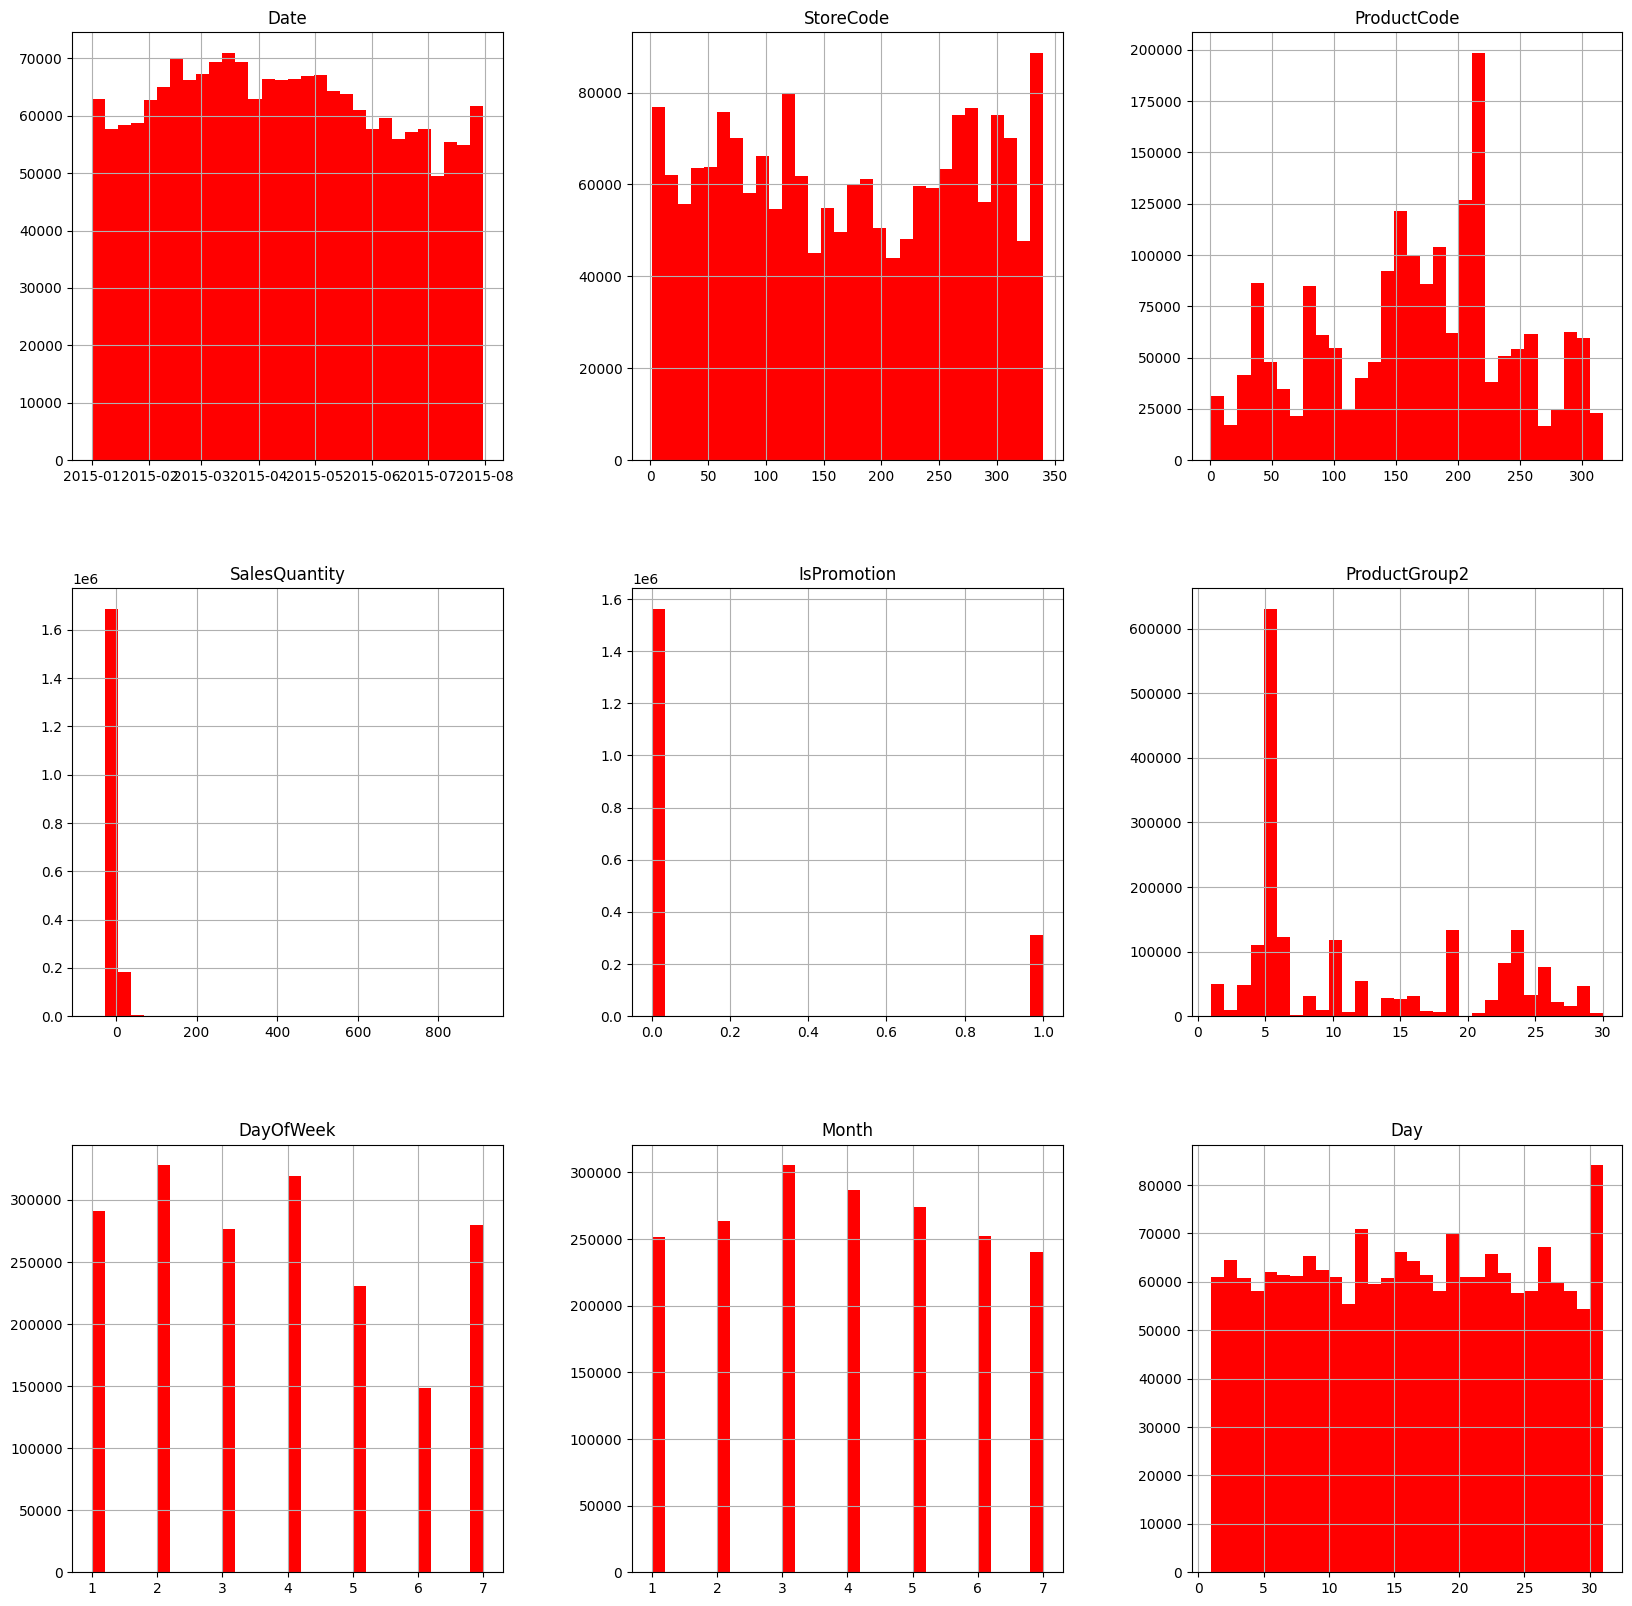

In [ ]:
# Sales_df tablomuzdaki kolonların değer dağılımlarını inceliyoruz.

sales_df.hist(bins=30,figsize=(20,20),color='r')

In [ ]:
promotion_counts = sales_df['IsPromotion'].value_counts()

print("IsPromotion sütununun değer dağılımı:")
print(promotion_counts)

IsPromotion sütununun değer dağılımı:
0.0    1562695
1.0     310923
Name: IsPromotion, dtype: int64


In [ ]:
sales_df

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromotionName,ProductGroup1,ProductGroup2,DayOfWeek,Month,Day
0,2015-01-01,8,9,-1,0.0,0,H,15,4,1,1
1,2015-01-01,131,9,1,0.0,0,H,15,4,1,1
2,2015-01-01,144,9,2,0.0,0,H,15,4,1,1
3,2015-01-01,203,9,2,0.0,0,H,15,4,1,1
4,2015-01-01,256,9,0,0.0,0,H,15,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1873613,2015-07-30,292,315,0,0.0,0,D,16,4,7,30
1873614,2015-07-31,12,315,1,0.0,0,D,16,5,7,31
1873615,2015-07-31,104,315,1,0.0,0,D,16,5,7,31
1873616,2015-07-31,261,315,1,0.0,0,D,16,5,7,31


<ipython-input-24-bd304078bb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_df.corr()


<Axes: >

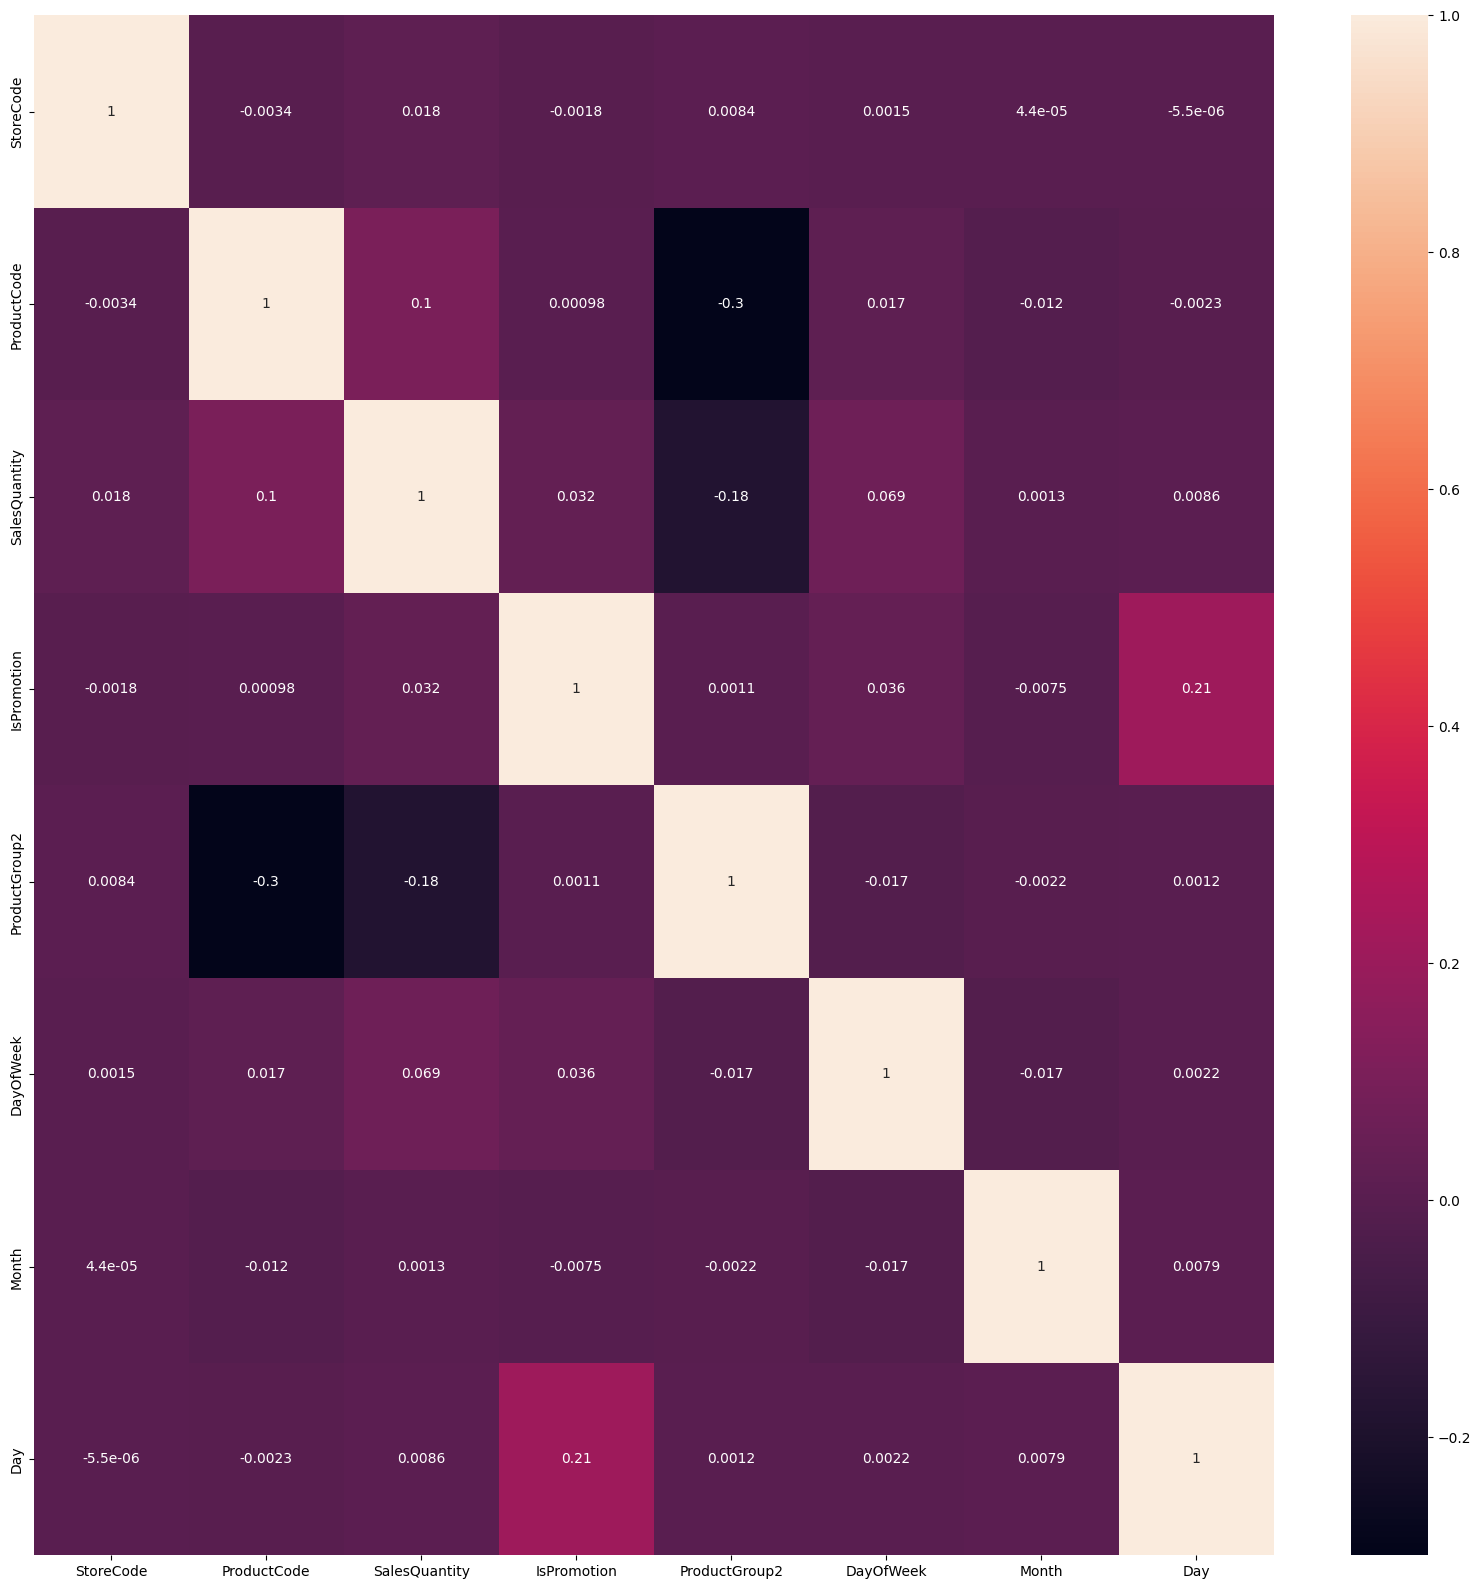

In [ ]:
correlations = sales_df.corr()
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot=True)

<Figure size 640x480 with 0 Axes>

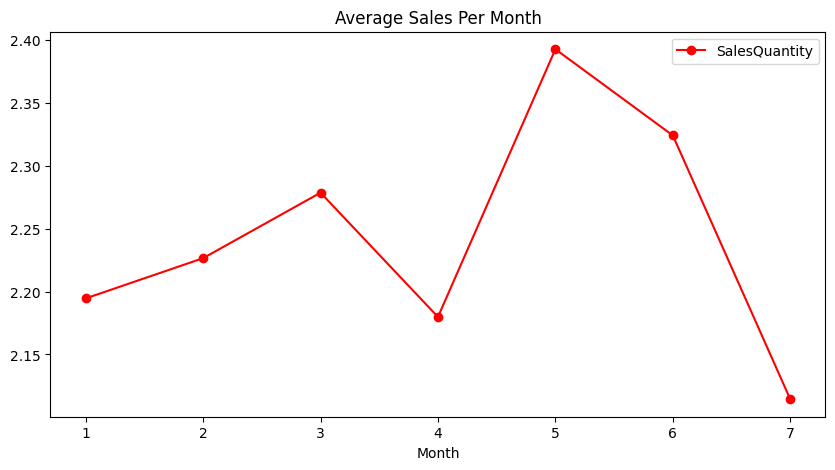

<Figure size 640x480 with 0 Axes>

In [ ]:
axis = sales_df.groupby('Month')[['SalesQuantity']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')

plt.figure()


<Figure size 640x480 with 0 Axes>

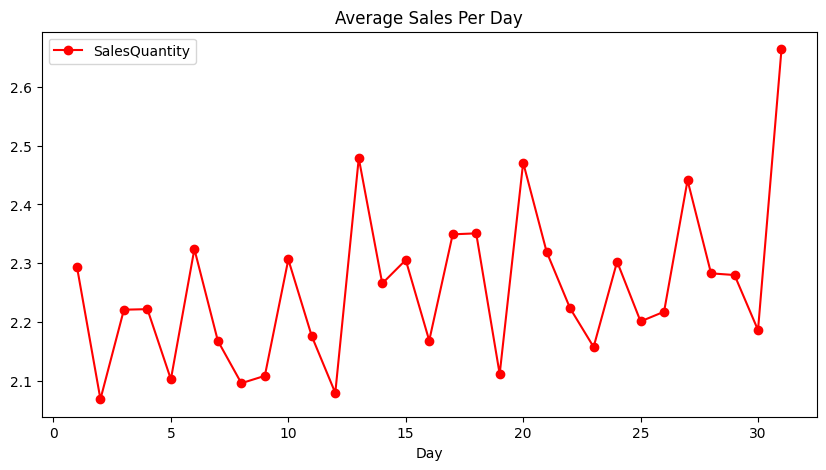

<Figure size 640x480 with 0 Axes>

In [ ]:
axis = sales_df.groupby('Day')[['SalesQuantity']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')

plt.figure()

<Figure size 640x480 with 0 Axes>

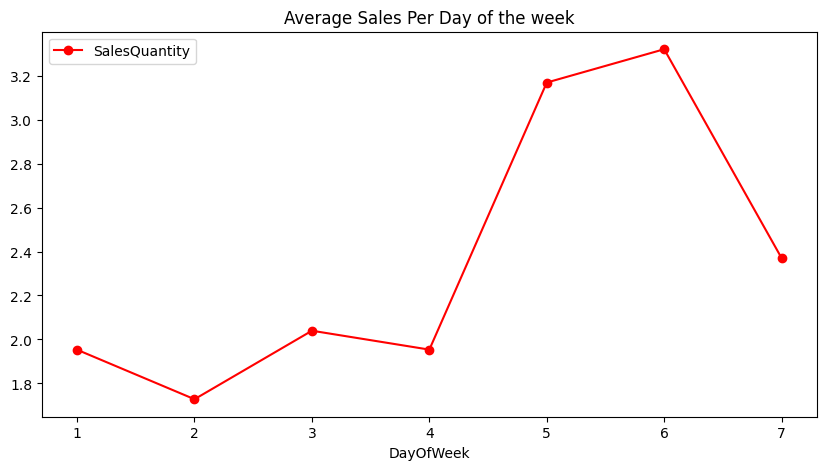

<Figure size 640x480 with 0 Axes>

In [ ]:
axis = sales_df.groupby('DayOfWeek')[['SalesQuantity']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the week')

plt.figure()

In [ ]:
sales_df

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromotionName,ProductGroup1,ProductGroup2,DayOfWeek,Month,Day
0,2015-01-01,8,9,-1,0.0,0,H,15,4,1,1
1,2015-01-01,131,9,1,0.0,0,H,15,4,1,1
2,2015-01-01,144,9,2,0.0,0,H,15,4,1,1
3,2015-01-01,203,9,2,0.0,0,H,15,4,1,1
4,2015-01-01,256,9,0,0.0,0,H,15,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1873613,2015-07-30,292,315,0,0.0,0,D,16,4,7,30
1873614,2015-07-31,12,315,1,0.0,0,D,16,5,7,31
1873615,2015-07-31,104,315,1,0.0,0,D,16,5,7,31
1873616,2015-07-31,261,315,1,0.0,0,D,16,5,7,31


### 4.Product ve Store Gruplarının Belirlenmesi

In [ ]:
non_promotion_sales = sales_df[sales_df['IsPromotion'] == 0]

non_promotion_sales['Week'] = non_promotion_sales['Date'].dt.strftime('%Y-%U')
weekly_sales = non_promotion_sales.groupby(['ProductCode', 'Week', 'StoreCode'])['SalesQuantity'].sum().reset_index()

weekly_avg_sales = weekly_sales.groupby('ProductCode')['SalesQuantity'].mean().reset_index()

# Ürünleri adetsel olarak gruplandırma
threshold_high = weekly_avg_sales['SalesQuantity'].quantile(0.75)
threshold_low = weekly_avg_sales['SalesQuantity'].quantile(0.25)

def categorize_product(sales):
    if sales > threshold_high:
        return 'Fast items'
    elif sales < threshold_low:
        return 'Slow items'
    else:
        return 'Medium items'

weekly_avg_sales['ProductCategory'] = weekly_avg_sales['SalesQuantity'].apply(categorize_product)

<ipython-input-29-706855eccc34>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_promotion_sales['Week'] = non_promotion_sales['Date'].dt.strftime('%Y-%U')


In [ ]:
weekly_avg_sales

,ProductCode,SalesQuantity,ProductCategory
0,1,3.567108,Fast items
1,2,3.059785,Fast items
2,3,2.382773,Medium items
3,4,2.924572,Fast items
4,5,2.800955,Fast items
...,...,...,...
311,313,4.633588,Fast items
312,314,0.677094,Medium items
313,315,0.518519,Slow items
314,316,0.603096,Medium items


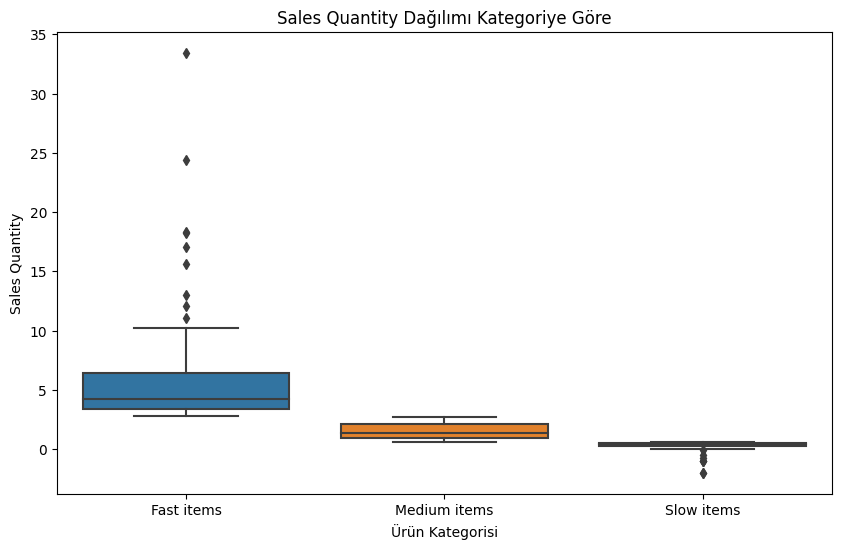

In [ ]:
# Boxplot ile dağılımı görselleştirme
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductCategory', y='SalesQuantity', data=weekly_avg_sales)
plt.title('Sales Quantity Dağılımı Kategoriye Göre')
plt.xlabel('Ürün Kategorisi')
plt.ylabel('Sales Quantity')
plt.show()

In [ ]:
weekly_avg_sales['ProductCategory'].value_counts()

Medium items    158
Fast items       79
Slow items       79
Name: ProductCategory, dtype: int64

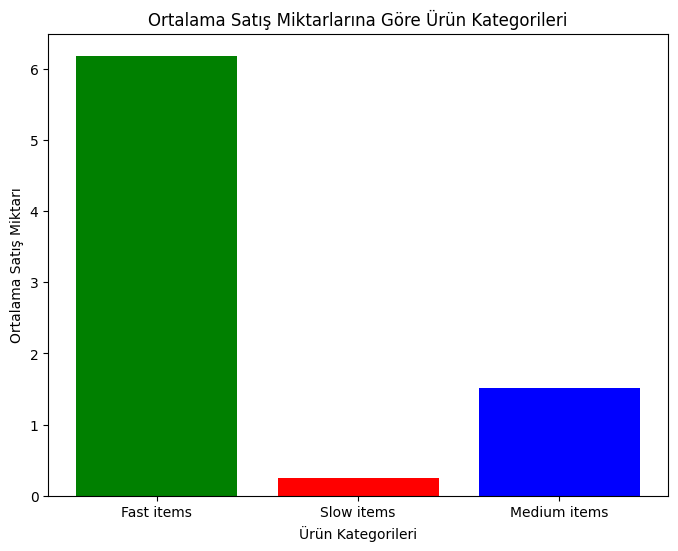

In [ ]:
import matplotlib.pyplot as plt

# 'Fast items', 'Slow items' ve 'Medium items' için ortalama satış miktarlarını alma
fast_items = weekly_avg_sales[weekly_avg_sales['ProductCategory'] == 'Fast items']
slow_items = weekly_avg_sales[weekly_avg_sales['ProductCategory'] == 'Slow items']
medium_items = weekly_avg_sales[weekly_avg_sales['ProductCategory'] == 'Medium items']

x = ['Fast items', 'Slow items', 'Medium items']
y = [fast_items['SalesQuantity'].mean(), slow_items['SalesQuantity'].mean(), medium_items['SalesQuantity'].mean()]

plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['green', 'red', 'blue'])
plt.title('Ortalama Satış Miktarlarına Göre Ürün Kategorileri')
plt.xlabel('Ürün Kategorileri')
plt.ylabel('Ortalama Satış Miktarı')
plt.show()


In [ ]:
from scipy import stats
z_scores = stats.zscore(weekly_avg_sales['SalesQuantity'])

weekly_avg_sales['Z_Scores'] = z_scores

threshold_low = -0.5
threshold_high = 0.5

# Z skorlarına göre ürünleri gruplandırma
def categorize_product_zscore(z_score):
    if z_score > threshold_high:
        return 'Fast items'
    elif z_score < threshold_low:
        return 'Slow items'
    else:
        return 'Medium items'

weekly_avg_sales['ProductCategory_ZScore'] = weekly_avg_sales['Z_Scores'].apply(categorize_product_zscore)
weekly_avg_sales

,ProductCode,SalesQuantity,ProductCategory,Z_Scores,ProductCategory_ZScore
0,1,3.567108,Fast items,0.346427,Medium items
1,2,3.059785,Fast items,0.199940,Medium items
2,3,2.382773,Medium items,0.004456,Medium items
3,4,2.924572,Fast items,0.160898,Medium items
4,5,2.800955,Fast items,0.125204,Medium items
...,...,...,...,...,...
311,313,4.633588,Fast items,0.654368,Fast items
312,314,0.677094,Medium items,-0.488052,Medium items
313,315,0.518519,Slow items,-0.533840,Slow items
314,316,0.603096,Medium items,-0.509418,Slow items


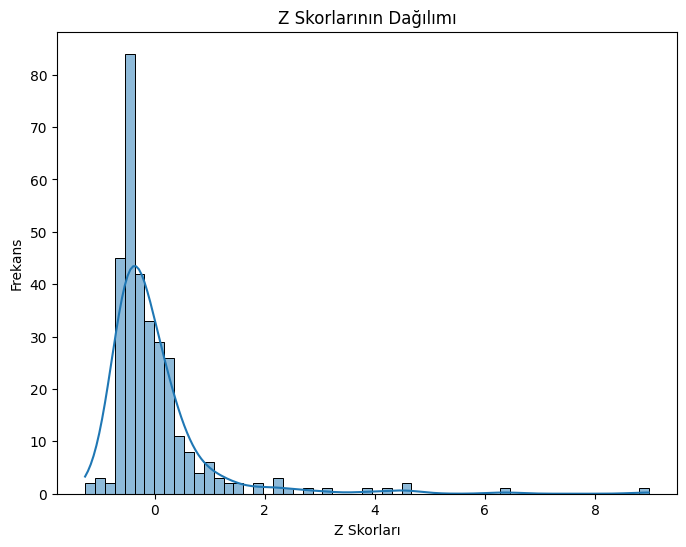

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(weekly_avg_sales['Z_Scores'], kde=True)
plt.title('Z Skorlarının Dağılımı')
plt.xlabel('Z Skorları')
plt.ylabel('Frekans')
plt.show()

In [ ]:
weekly_avg_sales.head(10)

,ProductCode,SalesQuantity,ProductCategory,Z_Scores,ProductCategory_ZScore
0,1,3.567108,Fast items,0.346427,Medium items
1,2,3.059785,Fast items,0.199940,Medium items
2,3,2.382773,Medium items,0.004456,Medium items
3,4,2.924572,Fast items,0.160898,Medium items
4,5,2.800955,Fast items,0.125204,Medium items
5,6,0.595005,Slow items,-0.511754,Slow items
6,7,2.233109,Medium items,-0.038759,Medium items
7,8,1.437500,Medium items,-0.268488,Medium items
8,9,0.464770,Slow items,-0.549359,Slow items
9,10,0.075269,Slow items,-0.661826,Slow items


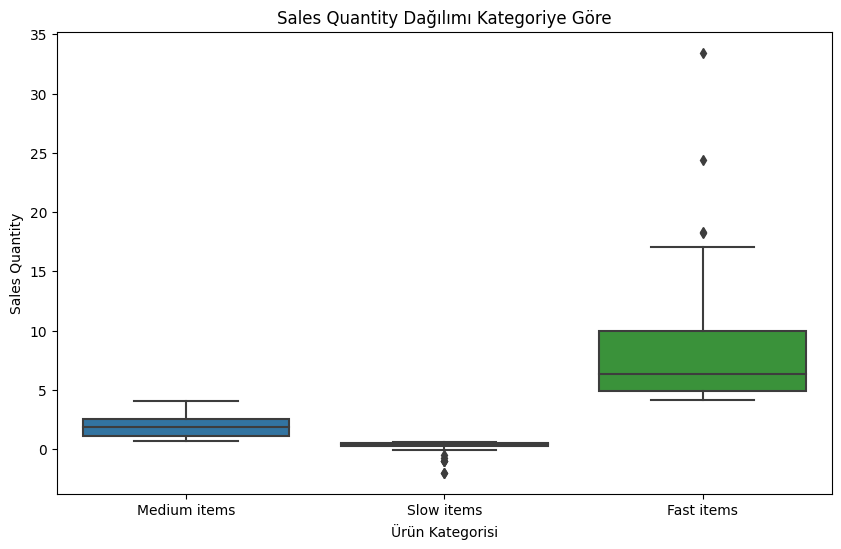

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ProductCategory_ZScore', y='SalesQuantity', data=weekly_avg_sales)
plt.title('Sales Quantity Dağılımı Kategoriye Göre')
plt.xlabel('Ürün Kategorisi')
plt.ylabel('Sales Quantity')
plt.show()

In [ ]:
weekly_avg_sales['ProductCategory_ZScore'].value_counts()

Medium items    187
Slow items       88
Fast items       41
Name: ProductCategory_ZScore, dtype: int64

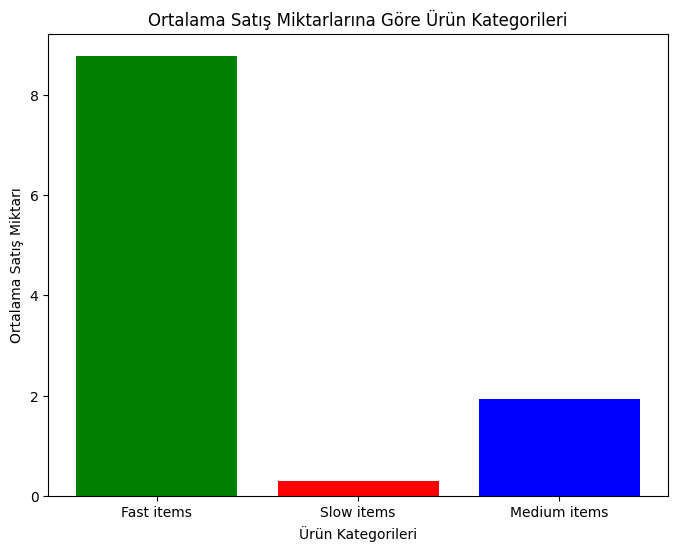

In [ ]:
fast_items = weekly_avg_sales[weekly_avg_sales['ProductCategory_ZScore'] == 'Fast items']
slow_items = weekly_avg_sales[weekly_avg_sales['ProductCategory_ZScore'] == 'Slow items']
medium_items = weekly_avg_sales[weekly_avg_sales['ProductCategory_ZScore'] == 'Medium items']

x = ['Fast items', 'Slow items', 'Medium items']
y = [fast_items['SalesQuantity'].mean(), slow_items['SalesQuantity'].mean(), medium_items['SalesQuantity'].mean()]

plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['green', 'red', 'blue'])
plt.title('Ortalama Satış Miktarlarına Göre Ürün Kategorileri')
plt.xlabel('Ürün Kategorileri')
plt.ylabel('Ortalama Satış Miktarı')
plt.show()


In [ ]:
sales_df = sales_df.merge(weekly_avg_sales[['ProductCode', 'ProductCategory_ZScore']], on='ProductCode', how='left')
sales_df

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromotionName,ProductGroup1,ProductGroup2,DayOfWeek,Month,Day,ProductCategory_ZScore
0,2015-01-01,8,9,-1,0.0,0,H,15,4,1,1,Slow items
1,2015-01-01,131,9,1,0.0,0,H,15,4,1,1,Slow items
2,2015-01-01,144,9,2,0.0,0,H,15,4,1,1,Slow items
3,2015-01-01,203,9,2,0.0,0,H,15,4,1,1,Slow items
4,2015-01-01,256,9,0,0.0,0,H,15,4,1,1,Slow items
...,...,...,...,...,...,...,...,...,...,...,...,...
1873613,2015-07-30,292,315,0,0.0,0,D,16,4,7,30,Slow items
1873614,2015-07-31,12,315,1,0.0,0,D,16,5,7,31,Slow items
1873615,2015-07-31,104,315,1,0.0,0,D,16,5,7,31,Slow items
1873616,2015-07-31,261,315,1,0.0,0,D,16,5,7,31,Slow items


In [ ]:
sales_df[sales_df['ProductCategory_ZScore'].isnull()]

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromotionName,ProductGroup1,ProductGroup2,DayOfWeek,Month,Day,ProductCategory_ZScore
1182790,2015-02-16,3,261,0,1.0,Promo1,F,27,1,2,16,NaN


In [ ]:
sales_df=sales_df.dropna(subset=['ProductCategory_ZScore'])

In [ ]:
# Promosyon dönemlerini belirleme
non_promotion_sales = sales_df[sales_df['IsPromotion'] == 0]

# Haftalık satış miktarlarını hesaplama
non_promotion_sales['Week'] = non_promotion_sales['Date'].dt.strftime('%Y-%U')
weekly_store_sales = non_promotion_sales.groupby(['ProductCode', 'Week', 'StoreCode'])['SalesQuantity'].sum().reset_index()

# Mağaza bazında haftalık ortalama satışları hesaplama
weekly_avg_store_sales = weekly_store_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()

<ipython-input-47-18139f98f22b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_promotion_sales['Week'] = non_promotion_sales['Date'].dt.strftime('%Y-%U')


In [ ]:
weekly_avg_store_sales

,StoreCode,SalesQuantity
0,1,3.360544
1,2,8.185697
2,3,2.745042
3,4,3.650611
4,5,2.914041
...,...,...
335,336,3.083043
336,337,3.644084
337,338,3.230382
338,339,4.359896


In [ ]:
from scipy import stats
z_scores = stats.zscore(weekly_avg_store_sales['SalesQuantity'])

weekly_avg_store_sales['Z_Scores'] = z_scores

threshold_low = -0.5
threshold_high = 0.5

def categorize_product_zscore(z_score):
    if z_score > threshold_high:
        return 'Fast stores'
    elif z_score < threshold_low:
        return 'Slow stores'
    else:
        return 'Medium stores'

weekly_avg_store_sales['StoreCategory_ZScore'] = weekly_avg_store_sales['Z_Scores'].apply(categorize_product_zscore)
weekly_avg_store_sales


,StoreCode,SalesQuantity,Z_Scores,StoreCategory_ZScore
0,1,3.360544,-0.123107,Medium stores
1,2,8.185697,3.468109,Fast stores
2,3,2.745042,-0.581206,Slow stores
3,4,3.650611,0.092781,Medium stores
4,5,2.914041,-0.455425,Medium stores
...,...,...,...,...
335,336,3.083043,-0.329643,Medium stores
336,337,3.644084,0.087923,Medium stores
337,338,3.230382,-0.219982,Medium stores
338,339,4.359896,0.620681,Fast stores


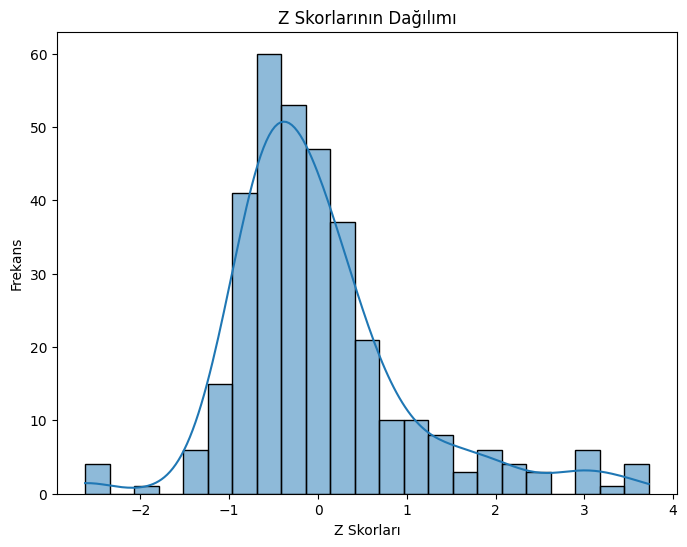

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(weekly_avg_store_sales['Z_Scores'], kde=True)
plt.title('Z Skorlarının Dağılımı')
plt.xlabel('Z Skorları')
plt.ylabel('Frekans')
plt.show()

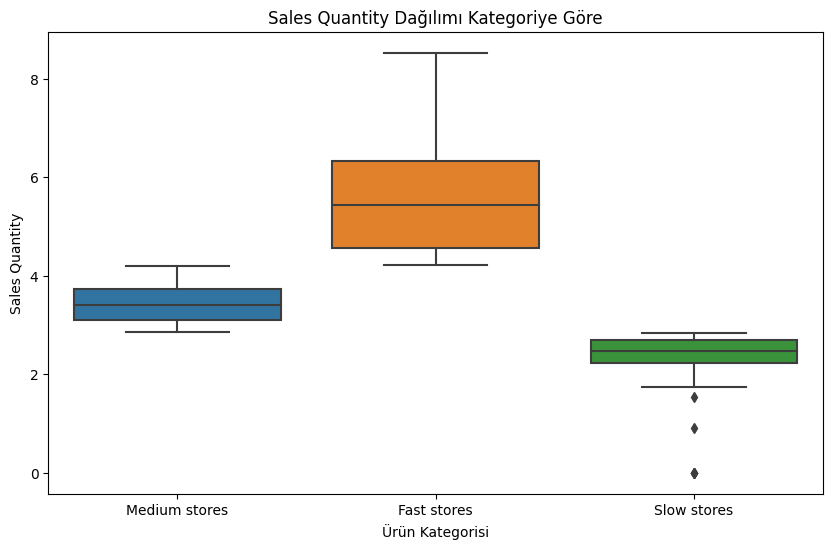

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreCategory_ZScore', y='SalesQuantity', data=weekly_avg_store_sales)
plt.title('Sales Quantity Dağılımı Kategoriye Göre')
plt.xlabel('Ürün Kategorisi')
plt.ylabel('Sales Quantity')
plt.show()

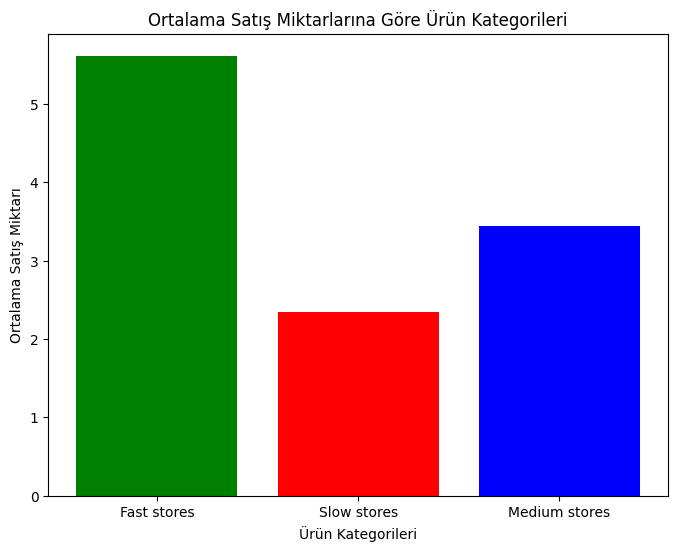

In [ ]:
fast_items = weekly_avg_store_sales[weekly_avg_store_sales['StoreCategory_ZScore'] == 'Fast stores']
slow_items = weekly_avg_store_sales[weekly_avg_store_sales['StoreCategory_ZScore'] == 'Slow stores']
medium_items = weekly_avg_store_sales[weekly_avg_store_sales['StoreCategory_ZScore'] == 'Medium stores']

x = ['Fast stores', 'Slow stores', 'Medium stores']
y = [fast_items['SalesQuantity'].mean(), slow_items['SalesQuantity'].mean(), medium_items['SalesQuantity'].mean()]

plt.figure(figsize=(8, 6))
plt.bar(x, y, color=['green', 'red', 'blue'])
plt.title('Ortalama Satış Miktarlarına Göre Ürün Kategorileri')
plt.xlabel('Ürün Kategorileri')
plt.ylabel('Ortalama Satış Miktarı')
plt.show()


In [ ]:
weekly_avg_store_sales['StoreCategory_ZScore'].value_counts()

Medium stores    162
Slow stores      109
Fast stores       69
Name: StoreCategory_ZScore, dtype: int64

In [ ]:
sales_df = sales_df.merge(weekly_avg_store_sales[['StoreCode', 'StoreCategory_ZScore']], on='StoreCode', how='left')
sales_df

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromotionName,ProductGroup1,ProductGroup2,DayOfWeek,Month,Day,ProductCategory_ZScore,StoreCategory_ZScore
0,2015-01-01,8,9,-1,0.0,0,H,15,4,1,1,Slow items,Medium stores
1,2015-01-01,131,9,1,0.0,0,H,15,4,1,1,Slow items,Medium stores
2,2015-01-01,144,9,2,0.0,0,H,15,4,1,1,Slow items,Slow stores
3,2015-01-01,203,9,2,0.0,0,H,15,4,1,1,Slow items,Slow stores
4,2015-01-01,256,9,0,0.0,0,H,15,4,1,1,Slow items,Fast stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873612,2015-07-30,292,315,0,0.0,0,D,16,4,7,30,Slow items,Slow stores
1873613,2015-07-31,12,315,1,0.0,0,D,16,5,7,31,Slow items,Slow stores
1873614,2015-07-31,104,315,1,0.0,0,D,16,5,7,31,Slow items,Medium stores
1873615,2015-07-31,261,315,1,0.0,0,D,16,5,7,31,Slow items,Slow stores


### 5.Product ve Store Gruplarını Satışlara Etkisinin Analizi

<ipython-input-58-30a5963db077>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_df.groupby(['Date','ProductCategory_ZScore']).mean()['SalesQuantity'].unstack().plot(ax=ax)


<Axes: xlabel='Date'>

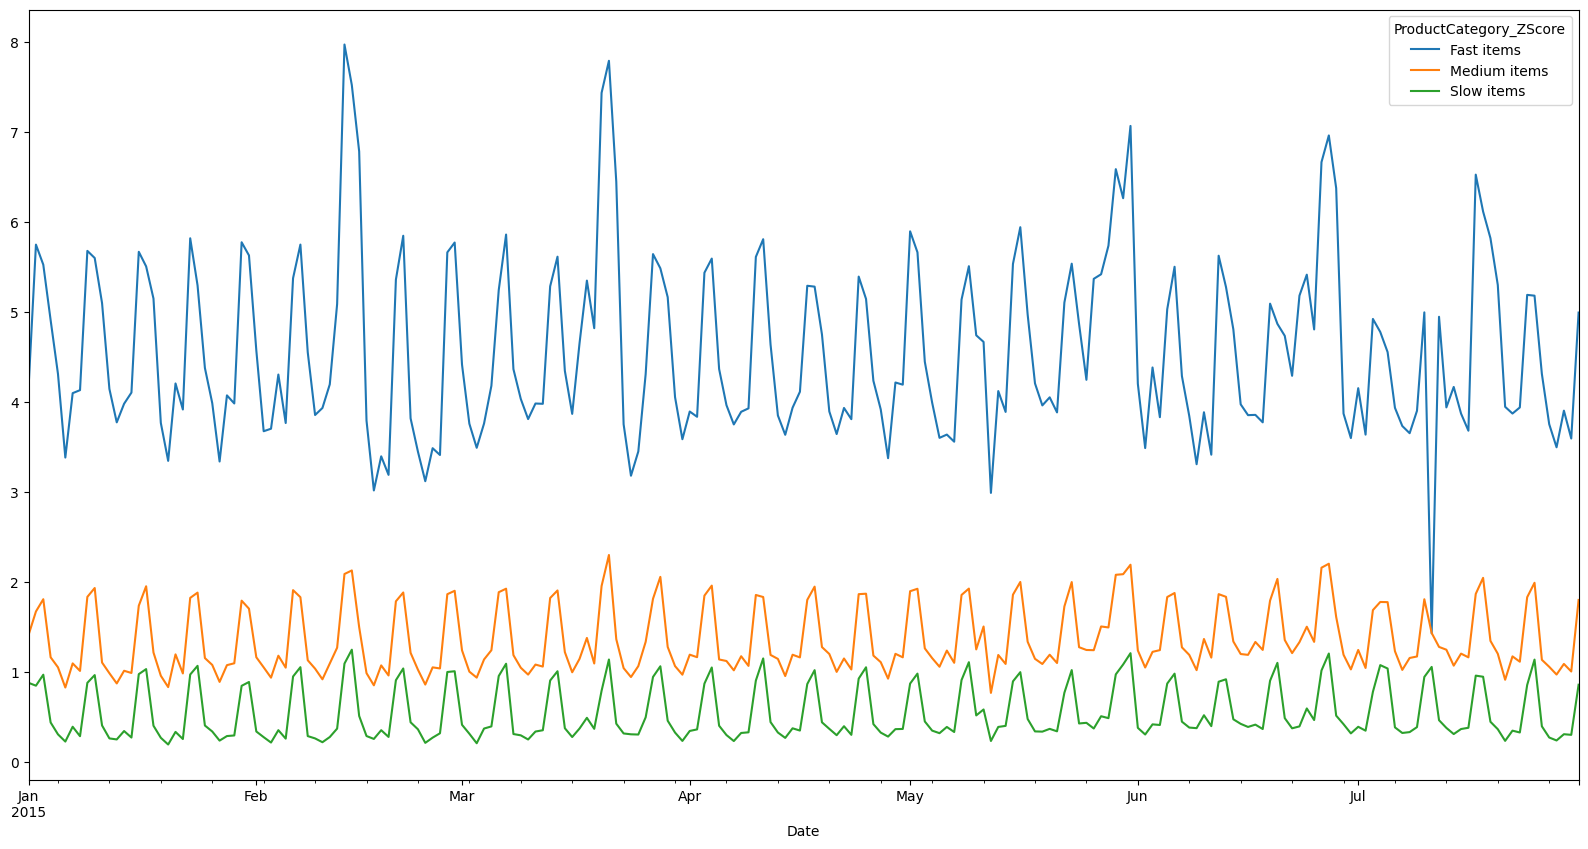

In [ ]:
fig,ax= plt.subplots(figsize=(20,10))

sales_df.groupby(['Date','ProductCategory_ZScore']).mean()['SalesQuantity'].unstack().plot(ax=ax)

<ipython-input-59-7540516509f2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_df.groupby(['Date','StoreCategory_ZScore']).mean()['SalesQuantity'].unstack().plot(ax=ax)


<Axes: xlabel='Date'>

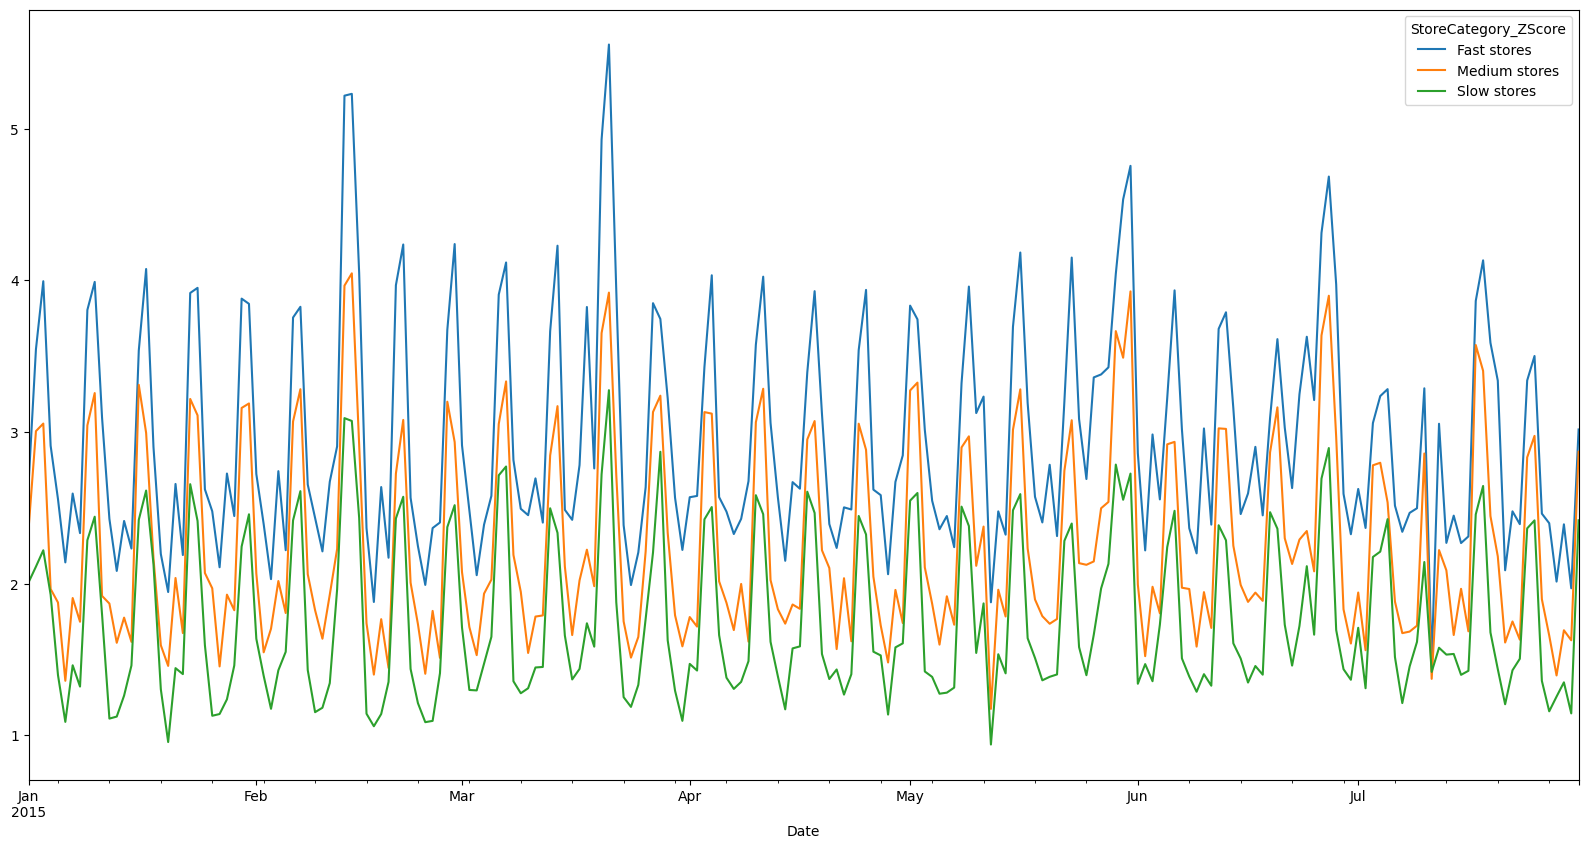

In [ ]:
fig,ax= plt.subplots(figsize=(20,10))

sales_df.groupby(['Date','StoreCategory_ZScore']).mean()['SalesQuantity'].unstack().plot(ax=ax)

### 6.Keşifsel Analiz Yapılması

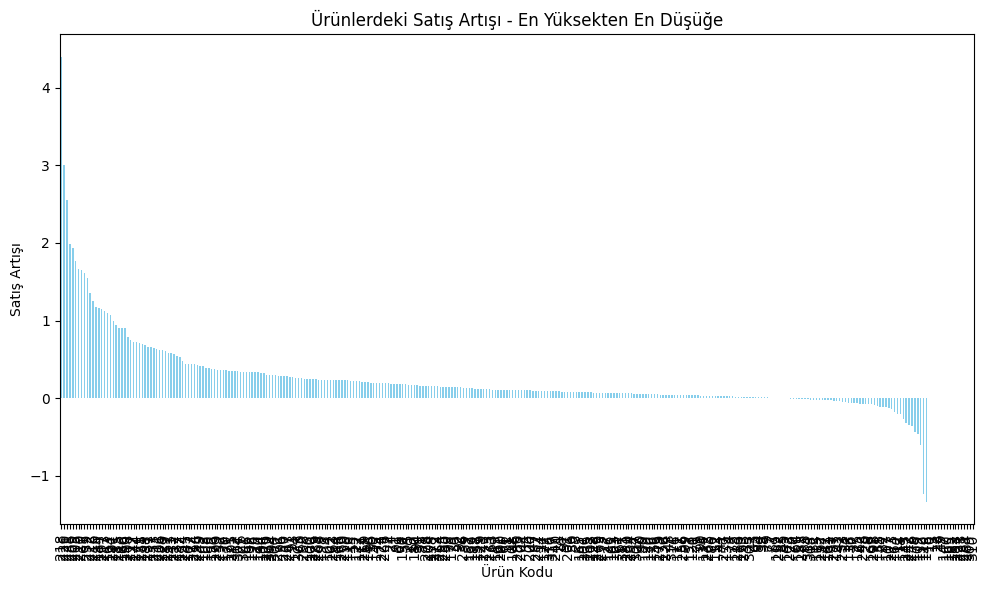

In [ ]:
promotion_sales = sales_df[sales_df['IsPromotion'] == 1]

non_promotion_avg = sales_df[sales_df['IsPromotion'] == 0].groupby('ProductCode')['SalesQuantity'].mean()
promotion_avg = promotion_sales.groupby('ProductCode')['SalesQuantity'].mean()

sales_increase = (promotion_avg - non_promotion_avg).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sales_increase.plot(kind='bar', color='skyblue')
plt.xlabel('Ürün Kodu')
plt.ylabel('Satış Artışı')
plt.title('Ürünlerdeki Satış Artışı - En Yüksekten En Düşüğe')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


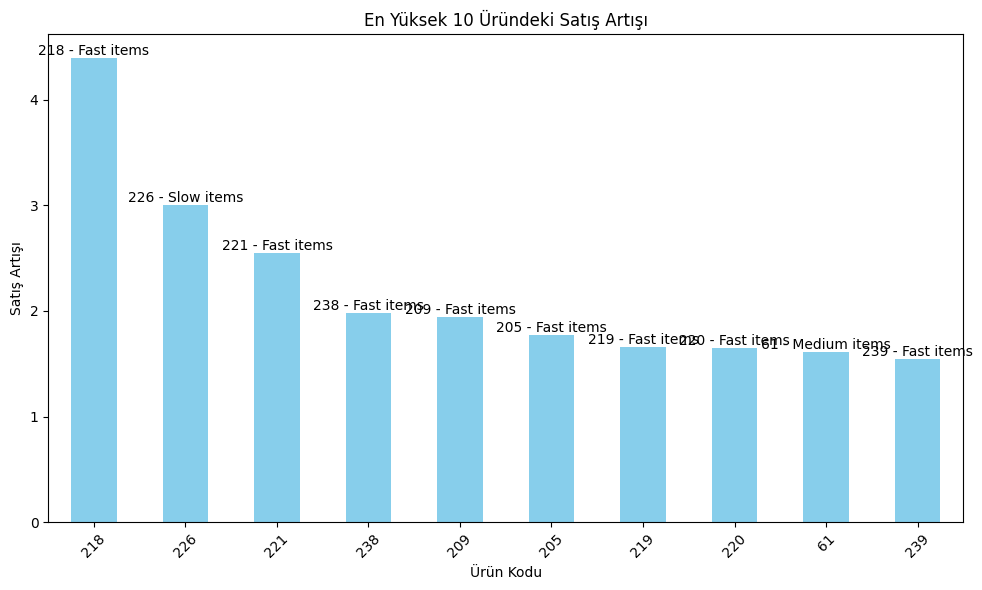

In [ ]:
promotion_sales = sales_df[sales_df['IsPromotion'] == 1]

non_promotion_avg = sales_df[sales_df['IsPromotion'] == 0].groupby('ProductCode')['SalesQuantity'].mean()
promotion_avg = promotion_sales.groupby('ProductCode')['SalesQuantity'].mean()

sales_increase = (promotion_avg - non_promotion_avg).sort_values(ascending=False)

# Yalnızca ilk 10 ürünü gösterme
top_10_sales_increase = sales_increase.head(10)

plt.figure(figsize=(10, 6))
top_10_sales_increase.plot(kind='bar', color='skyblue')
plt.xlabel('Ürün Kodu')
plt.ylabel('Satış Artışı')
plt.title('En Yüksek 10 Üründeki Satış Artışı')
plt.xticks(rotation=45)

for i, v in enumerate(top_10_sales_increase.index):
    product_category_zscore = sales_df.loc[sales_df['ProductCode'] == v, 'ProductCategory_ZScore'].values[0]
    plt.text(i, top_10_sales_increase[v], f"{v} - {product_category_zscore}", ha='center', va='bottom')


plt.tight_layout()
plt.show()


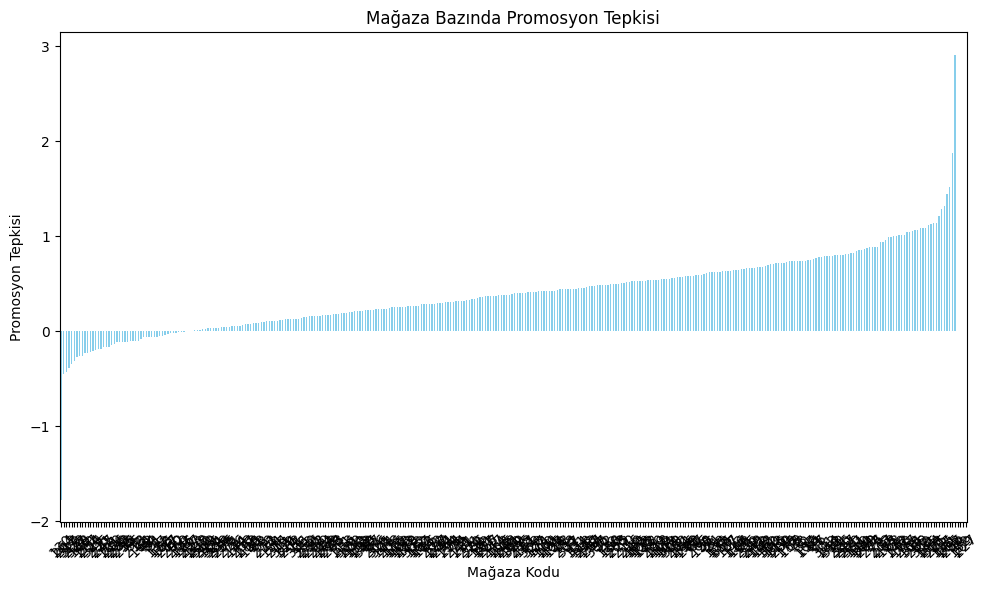

In [ ]:
promotion_sales = sales_df[sales_df['IsPromotion'] == 1]
store_promotion_avg = promotion_sales.groupby('StoreCode')['SalesQuantity'].mean()

non_promotion_sales = sales_df[sales_df['IsPromotion'] == 0]
store_non_promotion_avg = non_promotion_sales.groupby('StoreCode')['SalesQuantity'].mean()

# Promosyon reaksiyonu hesaplama
store_promotion_reaction = store_promotion_avg - store_non_promotion_avg

plt.figure(figsize=(10, 6))
store_promotion_reaction.sort_values().plot(kind='bar', color='skyblue')
plt.xlabel('Mağaza Kodu')
plt.ylabel('Promosyon Tepkisi')
plt.title('Mağaza Bazında Promosyon Tepkisi')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


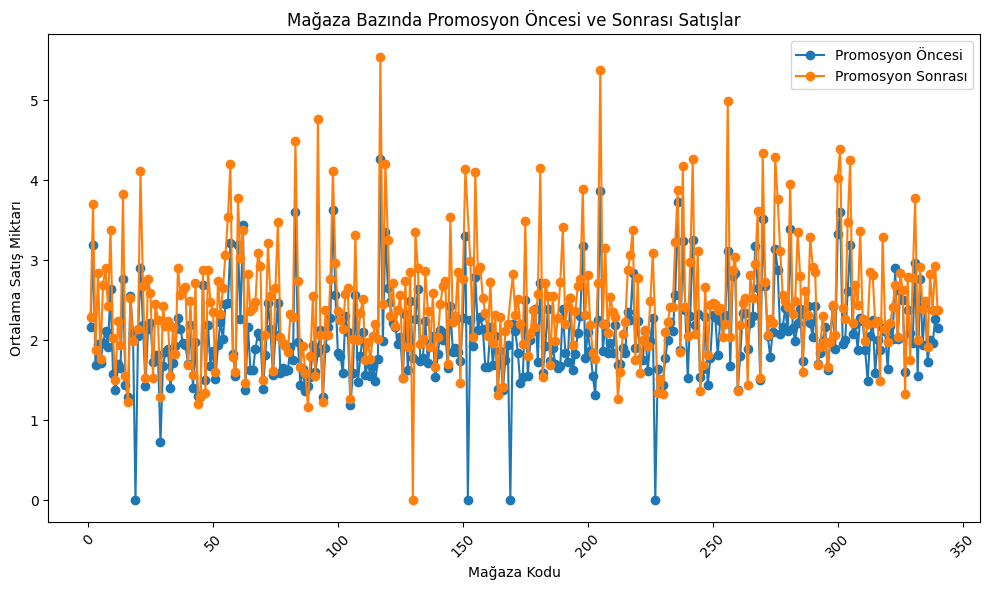

In [ ]:
# Promosyon öncesi ve sonrası satışları gruplama
pre_promotion_sales = sales_df[sales_df['IsPromotion'] == 0].groupby('StoreCode')['SalesQuantity'].mean()
post_promotion_sales = sales_df[sales_df['IsPromotion'] == 1].groupby('StoreCode')['SalesQuantity'].mean()

# Mağaza bazında promosyon öncesi ve sonrası satışları gösteren çizgi grafiği
plt.figure(figsize=(10, 6))
plt.plot(pre_promotion_sales.index, pre_promotion_sales.values, marker='o', linestyle='-', label='Promosyon Öncesi')
plt.plot(post_promotion_sales.index, post_promotion_sales.values, marker='o', linestyle='-', label='Promosyon Sonrası')

plt.xlabel('Mağaza Kodu')
plt.ylabel('Ortalama Satış Miktarı')
plt.title('Mağaza Bazında Promosyon Öncesi ve Sonrası Satışlar')
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


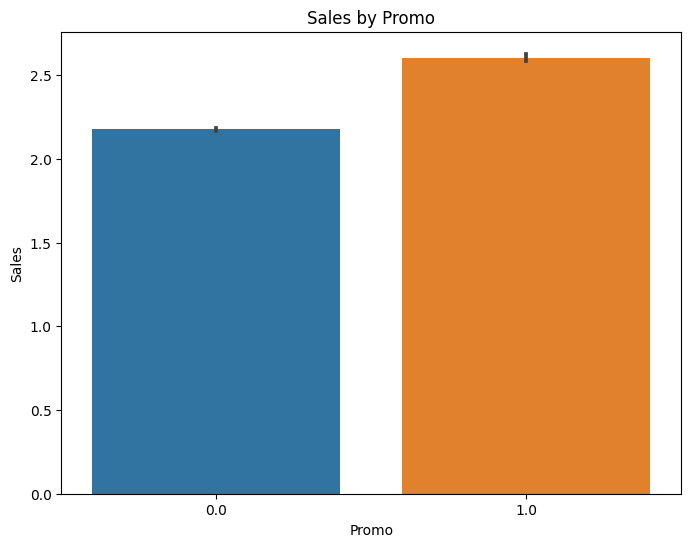

In [ ]:
plt.figure(figsize=[8, 6])
sns.barplot(x='IsPromotion', y='SalesQuantity', data=sales_df)
plt.title('Sales by Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()


In [ ]:
total_sales_by_store = sales_df.groupby('StoreCode')['SalesQuantity'].sum()
print(total_sales_by_store)

StoreCode
1      12582
2      41321
3       8328
4      13412
5      10432
       ...  
336    10993
337    14256
338    11878
339    16820
340    19027
Name: SalesQuantity, Length: 340, dtype: int64


In [ ]:
unique_products_by_store = sales_df.groupby('StoreCode')['ProductCode'].nunique().reset_index()
unique_products_by_store.columns = ['StoreCode', 'TotalProductVariety']

df_total_sales = pd.merge(df_total_sales, unique_products_by_store, on='StoreCode', how='left')

In [ ]:
df_total_sales

,StoreCode,TotalSalesQuantity,TotalProductVariety
0,1,12582,255
1,2,41321,262
2,3,8328,240
3,4,13412,260
4,5,10432,271
...,...,...,...
335,336,10993,247
336,337,14256,255
337,338,11878,252
338,339,16820,245


from matplotlib import pyplot as plt
df_total_sales['StoreCode'].plot(kind='hist', bins=20, title='StoreCode')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_total_sales['TotalSalesQuantity'].plot(kind='hist', bins=20, title='TotalSalesQuantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_total_sales['TotalProductVariety'].plot(kind='hist', bins=20, title='TotalProductVariety')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_total_sales.plot(kind='scatter', x='StoreCode', y='TotalSalesQuantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_total_sales.plot(kind='scatter', x='TotalSalesQuantity', y='TotalProductVariety', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['StoreCode']
  ys = series['TotalSalesQuantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_total_sales.sort_values('StoreCode', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('StoreCode')
_ = plt.ylabel('TotalSalesQuantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['StoreCode']
  ys = series['TotalProductVariety']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_total_sales.sort_values('StoreCode', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('StoreCode')
_ = plt.ylabel('TotalProductVariety')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['StoreCode']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'StoreCode'}, axis=1)
              .sort_values('StoreCode', ascending=True))
  xs = counted['StoreCode']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_total_sales.sort_values('StoreCode', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('StoreCode')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_total_sales['StoreCode'].plot(kind='line', figsize=(8, 4), title='StoreCode')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_total_sales['TotalSalesQuantity'].plot(kind='line', figsize=(8, 4), title='TotalSalesQuantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_total_sales['TotalProductVariety'].plot(kind='line', figsize=(8, 4), title='TotalProductVariety')
plt.gca().spines[['top', 'right']].set_visible(False)

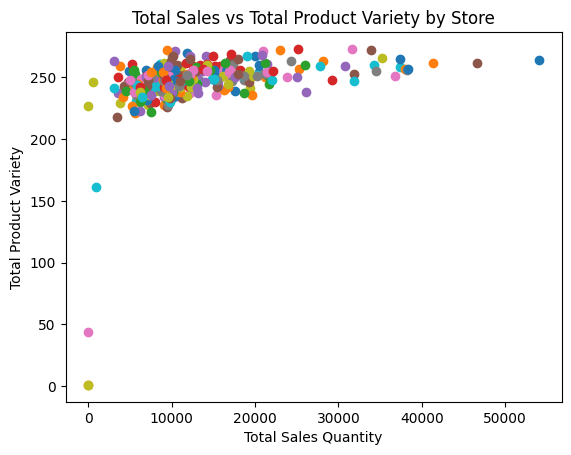

In [ ]:
for index, row in df_total_sales.iterrows():
    plt.scatter(row['TotalSalesQuantity'], row['TotalProductVariety'], label=f"StoreCode {row['StoreCode']}")

plt.xlabel('Total Sales Quantity')
plt.ylabel('Total Product Variety')
plt.title('Total Sales vs Total Product Variety by Store')
plt.show()

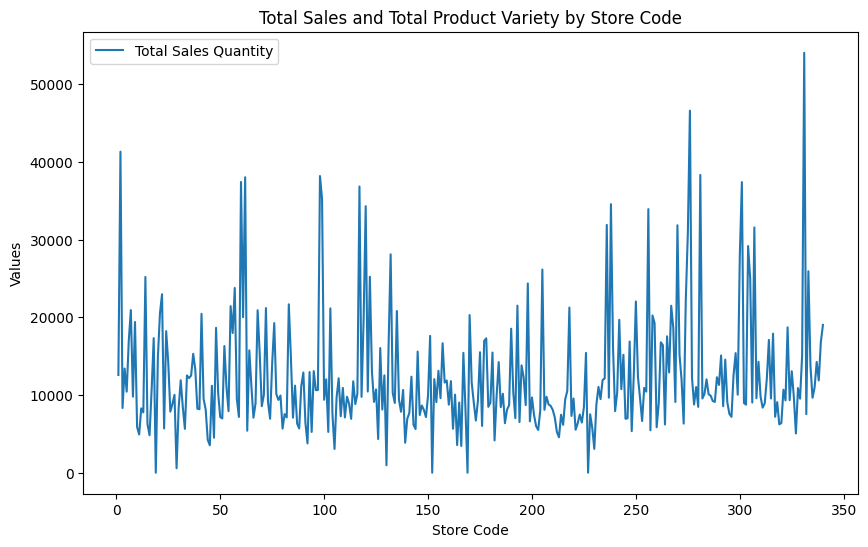

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_total_sales, x='StoreCode', y='TotalSalesQuantity', label='Total Sales Quantity')
plt.xlabel('Store Code')
plt.ylabel('Values')
plt.title('Total Sales and Total Product Variety by Store Code')
plt.legend()
plt.show()

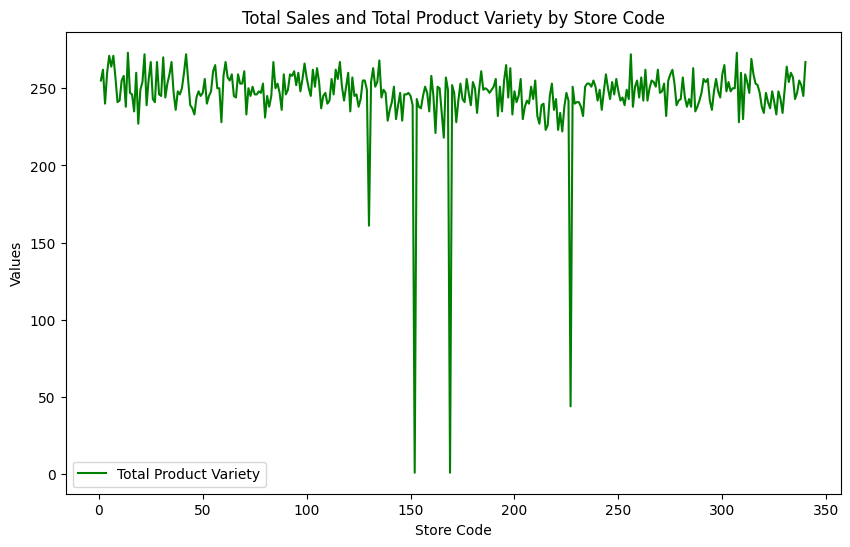

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_total_sales, x='StoreCode', y='TotalProductVariety', label='Total Product Variety',color='g')
plt.xlabel('Store Code')
plt.ylabel('Values')
plt.title('Total Sales and Total Product Variety by Store Code')
plt.legend()
plt.show()

### 7.Feature Engineering

In [ ]:
sales_df

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromotionName,ProductGroup1,ProductGroup2,DayOfWeek,Month,Day,ProductCategory_ZScore,StoreCategory_ZScore
0,2015-01-01,8,9,-1,0.0,0,H,15,4,1,1,Slow items,Medium stores
1,2015-01-01,131,9,1,0.0,0,H,15,4,1,1,Slow items,Medium stores
2,2015-01-01,144,9,2,0.0,0,H,15,4,1,1,Slow items,Slow stores
3,2015-01-01,203,9,2,0.0,0,H,15,4,1,1,Slow items,Slow stores
4,2015-01-01,256,9,0,0.0,0,H,15,4,1,1,Slow items,Fast stores
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873612,2015-07-30,292,315,0,0.0,0,D,16,4,7,30,Slow items,Slow stores
1873613,2015-07-31,12,315,1,0.0,0,D,16,5,7,31,Slow items,Slow stores
1873614,2015-07-31,104,315,1,0.0,0,D,16,5,7,31,Slow items,Medium stores
1873615,2015-07-31,261,315,1,0.0,0,D,16,5,7,31,Slow items,Slow stores


In [ ]:
from datetime import datetime
import pandas as pd
from meteostat import Daily, Point

start = datetime(2015, 1, 1)
end = datetime(2015, 7, 31)

istanbul_coordinates = Point(41.0082, 28.9784)  # İstanbul'un koordinatları

# Meteostat kütüphanesi kullanarak günlük verileri çekme
daily_data = Daily(istanbul_coordinates, start, end)
daily_data = daily_data.fetch()
daily_data=daily_data.drop(columns=['prcp','snow','wdir','wpgt','pres','tsun'])
columns_to_fill = ['tavg', 'tmin', 'tmax', 'wspd']
for column in columns_to_fill:
    mean_value = daily_data[column].mean()
    daily_data[column].fillna(mean_value, inplace=True)

daily_data.reset_index(inplace=True)
daily_data

,time,tavg,tmin,tmax,wspd
0,2015-01-01,3.2,2.6,4.0,36.9
1,2015-01-02,3.0,0.9,5.0,20.1
2,2015-01-03,3.6,-1.0,6.0,10.2
3,2015-01-04,7.2,4.7,9.0,24.1
4,2015-01-05,4.6,3.2,6.2,18.1
...,...,...,...,...,...
207,2015-07-27,28.6,23.8,34.0,9.2
208,2015-07-28,29.6,23.8,36.0,12.4
209,2015-07-29,30.8,26.3,36.0,18.9
210,2015-07-30,29.8,24.7,36.0,20.2


In [ ]:
daily_data.reset_index(inplace=True)

daily_data['time'] = pd.to_datetime(daily_data['time'])

sales_df['Date'] = pd.to_datetime(sales_df['Date'])

sales_df = pd.merge(sales_df, daily_data[['time', 'tavg', 'tmin', 'tmax', 'wspd']], left_on='Date', right_on='time', how='left')

sales_df.drop('time', axis=1, inplace=True)
sales_df

,Date,StoreCode,ProductCode,SalesQuantity,IsPromotion,PromotionName,ProductGroup1,ProductGroup2,DayOfWeek,Month,Day,ProductCategory_ZScore,StoreCategory_ZScore,tavg,tmin,tmax,wspd
0,2015-01-01,8,9,-1,0.0,0,H,15,4,1,1,Slow items,Medium stores,3.2,2.6,4.0,36.9
1,2015-01-01,131,9,1,0.0,0,H,15,4,1,1,Slow items,Medium stores,3.2,2.6,4.0,36.9
2,2015-01-01,144,9,2,0.0,0,H,15,4,1,1,Slow items,Slow stores,3.2,2.6,4.0,36.9
3,2015-01-01,203,9,2,0.0,0,H,15,4,1,1,Slow items,Slow stores,3.2,2.6,4.0,36.9
4,2015-01-01,256,9,0,0.0,0,H,15,4,1,1,Slow items,Fast stores,3.2,2.6,4.0,36.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873612,2015-07-30,292,315,0,0.0,0,D,16,4,7,30,Slow items,Slow stores,29.8,24.7,36.0,20.2
1873613,2015-07-31,12,315,1,0.0,0,D,16,5,7,31,Slow items,Slow stores,28.2,25.0,32.1,23.4
1873614,2015-07-31,104,315,1,0.0,0,D,16,5,7,31,Slow items,Medium stores,28.2,25.0,32.1,23.4
1873615,2015-07-31,261,315,1,0.0,0,D,16,5,7,31,Slow items,Slow stores,28.2,25.0,32.1,23.4


In [ ]:
sales_df.describe()

,StoreCode,ProductCode,SalesQuantity,IsPromotion,ProductGroup2,DayOfWeek,Month,Day,tavg,tmin,tmax,wspd
count,1.873617e+06,1.873617e+06,1.873617e+06,1.873617e+06,1.873617e+06,1.873617e+06,1.873617e+06,1.873617e+06,1.873617e+06,1.873617e+06,1.873617e+06,1.873617e+06
mean,1.711289e+02,1.663532e+02,2.246633e+00,1.659475e-01,1.175231e+01,3.765176e+00,3.952100e+00,1.562029e+01,1.432763e+01,1.127499e+01,1.765524e+01,1.601408e+01
std,1.014606e+02,7.773281e+01,5.028995e+00,3.720336e-01,8.605149e+00,1.993933e+00,1.941538e+00,8.713711e+00,7.581603e+00,7.045697e+00,8.457518e+00,6.592614e+00
min,1.000000e+00,1.000000e+00,-6.000000e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.500000e+00,-6.000000e+00,-1.800000e+00,5.200000e+00
25%,8.100000e+01,1.050000e+02,0.000000e+00,0.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00,8.200000e+00,6.000000e+00,1.100000e+01,1.110000e+01
50%,1.700000e+02,1.730000e+02,1.000000e+00,0.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,1.600000e+01,1.270000e+01,1.000000e+01,1.700000e+01,1.510000e+01
75%,2.640000e+02,2.190000e+02,2.000000e+00,0.000000e+00,1.900000e+01,5.000000e+00,6.000000e+00,2.300000e+01,2.110000e+01,1.800000e+01,2.500000e+01,1.910000e+01
max,3.400000e+02,3.170000e+02,9.120000e+02,1.000000e+00,3.000000e+01,7.000000e+00,7.000000e+00,3.100000e+01,3.080000e+01,2.630000e+01,3.600000e+01,3.790000e+01


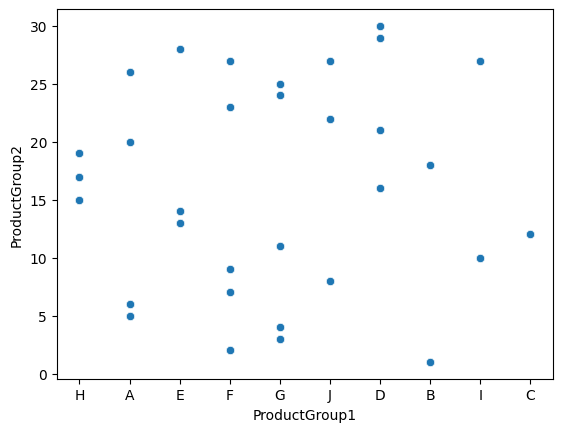

In [ ]:
# Veri çerçevesini kullanarak scatter plot çizme
sns.scatterplot(x='ProductGroup1', y='ProductGroup2', data=sales_df)
plt.show()


### 8.Modelling

In [ ]:
cat_features = ['StoreCode','ProductCode', 'PromotionName', 'ProductGroup1', 'ProductGroup2','ProductCategory_ZScore','StoreCategory_ZScore']

In [ ]:
from sklearn.model_selection import train_test_split
import catboost
import plotly.express as px
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats


In [ ]:
random_state=42

In [ ]:
X = sales_df.drop(columns = ["Date","SalesQuantity"])
y = sales_df["SalesQuantity"]
#X_val = df_test.drop(columns = "datetime_x")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

#y_train = y_train.astype('int')
#y_test = y_test.astype('int')

In [ ]:
print("x_train",len(X_train))
print("y_train",len(y_train))
print("x_test",len(X_test))
print("y_test",len(y_test))

x_train 1255323
y_train 1255323
x_test 618294
y_test 618294


In [ ]:
cat = catboost.CatBoostRegressor(random_state = random_state,cat_features = cat_features,max_depth = 5,
                                n_estimators=500)

In [ ]:
cat.fit(X_train,y_train)

Learning rate set to 0.222086
0:	learn: 4.8866003	total: 2.71s	remaining: 22m 31s
1:	learn: 4.7756018	total: 3.93s	remaining: 16m 18s
2:	learn: 4.7051192	total: 4.87s	remaining: 13m 27s
3:	learn: 4.6550653	total: 6.25s	remaining: 12m 55s
4:	learn: 4.6164914	total: 7.13s	remaining: 11m 45s
5:	learn: 4.5890876	total: 7.98s	remaining: 10m 56s
6:	learn: 4.5716113	total: 9.51s	remaining: 11m 10s
7:	learn: 4.5543828	total: 11.3s	remaining: 11m 35s
8:	learn: 4.5440626	total: 12.9s	remaining: 11m 45s
9:	learn: 4.5353436	total: 16.9s	remaining: 13m 49s
10:	learn: 4.5229381	total: 19.3s	remaining: 14m 17s
11:	learn: 4.5161098	total: 22.1s	remaining: 14m 59s
12:	learn: 4.5063753	total: 23.6s	remaining: 14m 43s
13:	learn: 4.4995325	total: 25.9s	remaining: 14m 57s
14:	learn: 4.4898513	total: 27.6s	remaining: 14m 52s
15:	learn: 4.4837219	total: 30.3s	remaining: 15m 17s
16:	learn: 4.4808769	total: 32.6s	remaining: 15m 27s
17:	learn: 4.4763439	total: 36s	remaining: 16m 4s
18:	learn: 4.4739125	total: 3

In [ ]:
feature_importance = cat.get_feature_importance()

# Create a DataFrame for plotting
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort DataFrame by importance
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Create a Plotly bar chart for feature importance
fig = px.bar(fi_df, x='Importance', y='Feature', orientation='h',
             title='CatBoost Feature Importance',
             labels={'Importance': 'Feature Importance', 'Feature': 'Feature'})

# Show the plot
fig.show()

In [ ]:
from sklearn.metrics import mean_squared_log_error
import numpy as np
y_pred = cat.predict(X_test)
#y_pred[y_pred<0] = 0
# RMSLE hesaplama
rmsle = np.sqrt(mean_squared_log_error(np.abs(y_test), np.abs(y_pred)))
print("RMSLE:", rmsle)


RMSLE: 0.6803579171137359
